#Trabajo Práctico 1: Modelos Predictivos en SciKit-Learn
##Integrantes
- Bautista Czerniuk
- Benicio Pastorino
- Zoe Pérez Colman

In [1]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer

##1) Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico (Recomendación: seleccionar un atributo a predecir binario). De encontrar algún dataset sin atributos categóricos, ¿Como se podría generar uno binario a partir de los atributos numéricos? Se recomienda utilizar Kaggle para la búsqueda del dataset. Antes de avanzar con el trabajo práctico, corroborar el dataset en clase.

In [2]:
#Mediante pd.DataFrame convertimos el csv en un DataFrame
dataset: pd.DataFrame = pd.read_csv('n_movies.csv')

##2) Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.

In [3]:
dataset.describe()

,rating
count,8784.000000
mean,6.764515
std,1.214840
min,1.700000
25%,6.100000
50%,6.900000
75%,7.600000
max,9.900000


In [4]:
dataset.dtypes

title           object
year            object
certificate     object
duration        object
genre           object
rating         float64
description     object
stars           object
votes           object
dtype: object

In [5]:
##Para reconocer un ejemplo de estos datos mostramos la primera fila del dataset
dataset.head(1)

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"


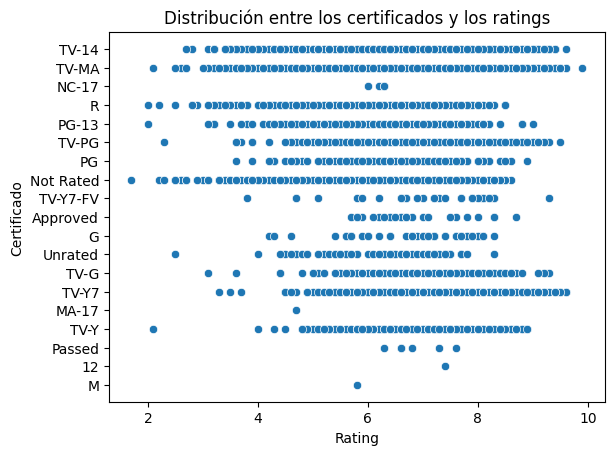

In [6]:
sns.scatterplot(x='rating', y='certificate', data=dataset)
plt.title('Distribución entre los certificados y los ratings')
plt.xlabel('Rating')
plt.ylabel('Certificado')
plt.show()

In [7]:
# luego eliminamos la columna "description" y "stars" porque no aporta nada
dataset = dataset.drop('description', axis=1)
dataset = dataset.drop('stars', axis=1)
dataset.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating', 'votes'], dtype='object')

##3) Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico.

In [8]:
#Encodeamos los certificados para que cada cartificado tenga un número diferente usando LabelEncoder
le: LabelEncoder = LabelEncoder()
le.fit(dataset.certificate)
dataset.certificate = le.transform(dataset.certificate)

dataset.head(10)

,title,year,certificate,duration,genre,rating,votes
0,Cobra Kai,(2018– ),12,30 min,"Action, Comedy, Drama",8.5,"177,031"
1,The Crown,(2016– ),14,58 min,"Biography, Drama, History",8.7,"199,885"
2,Better Call Saul,(2015–2022),14,46 min,"Crime, Drama",8.9,"501,384"
3,Devil in Ohio,(2022),14,356 min,"Drama, Horror, Mystery",5.9,"9,773"
4,Cyberpunk: Edgerunners,(2022– ),14,24 min,"Animation, Action, Adventure",8.6,"15,413"
5,The Sandman,(2022– ),14,45 min,"Drama, Fantasy, Horror",7.8,"116,358"
6,Rick and Morty,(2013– ),14,23 min,"Animation, Adventure, Comedy",9.2,"502,160"
7,Breaking Bad,(2008–2013),14,49 min,"Crime, Drama, Thriller",9.5,"1,831,340"
8,The Imperfects,(2022– ),14,45 min,"Action, Adventure, Drama",6.3,"3,123"
9,Blonde,(2022),6,166 min,"Biography, Drama, Mystery",6.2,935


In [9]:
#Encodeamos los títulos
le.fit(dataset.title)
dataset.title = le.transform(dataset.title)
dataset.head(10)

,title,year,certificate,duration,genre,rating,votes
0,1292,(2018– ),12,30 min,"Action, Comedy, Drama",8.5,"177,031"
1,6128,(2016– ),14,58 min,"Biography, Drama, History",8.7,"199,885"
2,777,(2015–2022),14,46 min,"Crime, Drama",8.9,"501,384"
3,1670,(2022),14,356 min,"Drama, Horror, Mystery",5.9,"9,773"
4,1450,(2022– ),14,24 min,"Animation, Action, Adventure",8.6,"15,413"
5,6762,(2022– ),14,45 min,"Drama, Fantasy, Horror",7.8,"116,358"
6,5009,(2013– ),14,23 min,"Animation, Adventure, Comedy",9.2,"502,160"
7,985,(2008–2013),14,49 min,"Crime, Drama, Thriller",9.5,"1,831,340"
8,6383,(2022– ),14,45 min,"Action, Adventure, Drama",6.3,"3,123"
9,885,(2022),6,166 min,"Biography, Drama, Mystery",6.2,935


In [10]:
#Encodeamos los años
le.fit(dataset.year)
dataset.year = le.transform(dataset.year)
dataset.head(10)

,title,year,certificate,duration,genre,rating,votes
0,1292,346,12,30 min,"Action, Comedy, Drama",8.5,"177,031"
1,6128,320,14,58 min,"Biography, Drama, History",8.7,"199,885"
2,777,315,14,46 min,"Crime, Drama",8.9,"501,384"
3,1670,388,14,356 min,"Drama, Horror, Mystery",5.9,"9,773"
4,1450,389,14,24 min,"Animation, Action, Adventure",8.6,"15,413"
5,6762,389,14,45 min,"Drama, Fantasy, Horror",7.8,"116,358"
6,5009,277,14,23 min,"Animation, Adventure, Comedy",9.2,"502,160"
7,985,208,14,49 min,"Crime, Drama, Thriller",9.5,"1,831,340"
8,6383,389,14,45 min,"Action, Adventure, Drama",6.3,"3,123"
9,885,388,6,166 min,"Biography, Drama, Mystery",6.2,935


In [11]:
#Tomamos duration y borramos el dato "min" para pasarlo a int
dataset['duration'].fillna(0, inplace=True)
dataset['duration'] = dataset['duration'].astype(str)

dataset['duration'] = dataset['duration'].apply(lambda x: int(x.split()[0]) if x.strip() else 0)

In [12]:
#Pasamos los votos a int
dataset['votes'] = pd.to_numeric(dataset['votes'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

In [13]:
#Borramos los NaN de rating
dataset.dropna(subset=['rating'], inplace=True)

##4) Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.

In [14]:
genres_split = dataset['genre'].str.split(',').explode()
genre_dataframe = pd.DataFrame({'genre': genres_split})

x:pd.DataFrame=dataset.drop(['rating'],1)
X:pd.DataFrame=x.drop(['genre'], axis=1)
Y:pd.Series=dataset.rating

<ipython-input-14-967906d8643c>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x:pd.DataFrame=dataset.drop(['rating'],1)


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
X_train

,title,year,certificate,duration,votes
3092,2771,334,20,20,644
9059,83,347,17,22,158
1110,6942,357,12,48,9281
6156,2451,357,20,60,109
6250,7075,72,7,30,364
...,...,...,...,...,...
3359,3660,380,15,70,483
4412,4648,388,14,58,239
5396,3059,331,20,105,183
5076,3204,479,14,99,1328


##5) Para el atributo numérico a predecir seleccionado:

a. Realizar un modelo de regresión lineal utilizando la clase LinearRegression de SciKit-Learn.

b. Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.

Sugerencia: Aprovechar los conceptos de validación y de validación cruzada para evaluar los modelos. Pueden utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

In [16]:
#LINEARREGRESSION
lr: LinearRegression = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [17]:
valor: float= lr.score(X_test, Y_test)
print("Score en la prueba" , valor)

Score en la prueba 0.06836109703749504


In [18]:
#DECISIONTREEREGRESSOR
dtr: DecisionTreeRegressor = DecisionTreeRegressor()

In [19]:
parametros: dict[str, list[int]] = {
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_leaf': [3, 4, 5, 7, 10, 13],
    'min_samples_split': [4, 8, 16, 32, 64, 70],
    'max_features': [3, 4, 5, 6, 7, 8],
    'splitter': [ 'random', 'best']
}

In [20]:
grid_search: GridSearchCV = GridSearchCV (dtr, parametros, error_score = 'raise', cv = 15)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=15, error_score='raise', estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 7, 10, 13],
                         'min_samples_split': [4, 8, 16, 32, 64, 70],
                         'splitter': ['random', 'best']})

In [21]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 10, 'min_samples_split': 32, 'splitter': 'best'}
0.2724672412275664


In [22]:
tree = grid_search.best_estimator_
tree.score(X_test, Y_test)

0.28649514644036156

###**Responder: ¿Qué formas tienen de evaluar los resultados de cada árbol de decisión? ¿Cómo eligen "el mejor árbol"? ¿Cómo se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?**

En ambos modelos comenzamos utilizando la función `cross_val_score` para ver cual era el error cuadrático medio pero no nos daba los mejores resultados y luego de investigar un rato encontramos la función `GridSearch` que nos devuelve cuales son los mejores parámetros para nuestro arbol. Por otro lado al momento de elegir el mejor árbol, usando `grid_search.best_params_` y `grid_search.best_score_` pudimos tomar los parametros que mas nos convenían y utilizarlos y luego tomar el best_score_.

AL momento de mirar los resultados de los dos modelos, el modelo del árbol de decisión nos dio un valor mucho mas cercano a 1 que el modelo de regresión lineal, por lo que es preferible para nuestro dataset utilizar un modelo de árbol de decisión, teniendo en cuenta que ambos aún nos presentan números relativamente bajos

##6) Para el atributo categórico a predecir seleccionado


*   Realizar un modelo de clasificación utilizano la clase `LogisticRegression` de SciKit-Learn
*   Realizar un modelo de clasificación utilizano la clase `DecisionTreeClassifier` de SciKit-Learn



In [23]:
dataset.dropna(subset=['genre'], inplace=True)

In [24]:
X: pd.DataFrame = dataset.drop('genre', 1)
y: pd.Series = dataset['genre']

<ipython-input-24-ab549d4a4146>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X: pd.DataFrame = dataset.drop('genre', 1)


In [25]:
impt = SimpleImputer(strategy = 'mean')
X = impt.fit_transform(X)

scaler: StandardScaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [27]:
#LogisticRegression
logr : LogisticRegression = LogisticRegression(random_state = 0)
logr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [28]:
y_predicciones =logr.predict(X_test)
print(y_predicciones)

accscore : float = accuracy_score(Y_test, y_predicciones)
print(accscore)

['Comedy' 'Drama' 'Documentary' ... 'Animation, Action, Adventure'
 'Animation, Action, Adventure' 'Documentary']
0.13943768996960487


In [29]:
#DecisionTreeClassifier
parametros: dict = {
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_leaf': [4, 8, 16, 32, 64, 70, 110],
    'min_samples_split': [4, 8, 16, 32, 64, 70, 110],
    'criterion' : ['entropy', 'gini']
}

DTC : DecisionTreeClassifier = DecisionTreeClassifier()

random_search : RandomizedSearchCV = RandomizedSearchCV(DTC, parametros, cv = 5, error_score='raise')
random_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_leaf': [4, 8, 16, 32, 64,
                                                             70, 110],
                                        'min_samples_split': [4, 8, 16, 32, 64,
                                                              70, 110]})

In [30]:
print(random_search.best_params_)
print(random_search.best_score_)

{'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 8, 'criterion': 'entropy'}
0.21042345276872965


In [31]:
DTC_tree : DecisionTreeClassifier = random_search.best_estimator_
print(DTC_tree)

y_pred = DTC_tree.predict(X_test)
print(y_pred)

#Comparar las predicciones con y_test
accscore : float = accuracy_score(Y_test, y_pred)
print(accscore)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       min_samples_split=4)
['Comedy' 'Drama, Romance' 'Documentary' ... 'Comedy'
 'Animation, Action, Adventure' 'Documentary']
0.21238601823708206


In [32]:
#Sin hiperparametros
DTC.fit(X_train, Y_train)

y_pred = DTC.predict(X_test)
accscore : float = accuracy_score(Y_test, y_pred)
accscore

0.23632218844984804

##7) Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?

###Método Leave-One-Out


Este método divide los datos en tantos pliegues como muestras haya al contrario de los métodos de K-fold, toma un punto como conjunto de prueba y en cada iteración se lo entrena en todos los puntos de datos proporcionados. Esto trae como ventaja una evaluación mucho mas precisa de los datos al no dejar nada afuera y aprovecha todos los pequeños datos que se le proporciona. Por otro lado, una desventaja de este método es que llevandolo a un punto mas computacional puede ser mas dificil y "cansador" al tener que ajustar y evaluar tantos datos como sean proporcionado entonces no es tan recomendado para datasets grandes.

In [ ]:
X: pd.DataFrame = dataset.drop('genre', 1)
y: pd.Series = dataset['genre']

impt = SimpleImputer(strategy='mean')
X = impt.fit_transform(X)

scaler: StandardScaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

logistic_regression = LogisticRegression()

loo = LeaveOneOut()
loo_scores = cross_val_score(logistic_regression, X_train, Y_train, cv=loo)
loo_mean = np.mean(loo_scores)
print("Leave-One-Out Cross Val Scores:", loo_scores)
print("Leave-One-Out Mean:", loo_mean)

<ipython-input-36-3aeb8869c394>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X: pd.DataFrame = dataset.drop('genre', 1)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-

###Método Group K-Fold

Este método es más útil para cuando tenes datos agrupados en grupos y queres que se mantengan así en vez de tener que dividirlos en grupos de entrenamiento y prueba. Se dividen los datos en grupos llamados K-Fold. Por lo tanto es una ventaja cuando se trabaja con datos en grupos y se quieren mantener de esta forma, por otro lado una desventaja es que es más dificil implementar la validación cruzada aleatoria además de que necesita información sobre cada grupo

##8)Escribir una conclusión sobre el trabajo realizado.


Después de utilizar todos los modelos predictivos descubrimos que el Decision Tree Classifier fue la opción más efectiva en términos de rendimiento predictivo. Al mismo tiempo, llegamos a la conclusión de que nuestro conjunto de datos no era el más adecuado para este trabajo ya que nos trajo varios problemas y aún así nos dio resultados considerablemente bajos. Por otro lado, el Leave-One-Out no nos parecio tan eficiente ya que tardo mucho en entrenarse con nuestros datos al tener que probar con cada dato...

Nos dimos cuenta de que pesar de la eficacia del método que utilicemos, es importante destacar que la calidad de los resultados está directamente relacionada con la calidad de los datos con los que se entrena, aún que nos parecio muy interesante las diferentes opciones que tenemos para entrenar nuestro modelo predictivo ya que cada modelo se puede usar para una situación diferente dependiendo de tus necesidades dandote espacio para conseguir el objetivo que te propongas.

Finalmente, aunque el Decision Tree Classifier fue una herramienta muy útil en nuestro trabajo, la calidad de los resultados siempre dependerá en gran medida de la calidad de los datos aportados. Por lo tanto, es fundamental tener en cuenta la mejora de los datos en futuros proyectos para obtener resultados mejores.

##Bonus
Investigar los métodos GridSearch y RandomSearch para la búsqueda de hiperparámetros. Utilizarlos para encontrar los mejores hiperparámetros para los modelos. CUMPLIDO

Para ya sea el atributo categórico como para el numérico, elegir otro modelo de clasificación o regresión que no haya sido utilizado anteriormente. Entrenar el modelo y comparar los resultados con los obtenidos anteriormente. CUMPLIDO